In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from tree_utils import *
import pandas as pd
import joblib


In [3]:
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Data/MPBROCKMETAL_KGDataSet.csv")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl") 
best_tree = joblib.load("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Modeling/best_tree.pkl")

In [4]:
del df["Unnamed: 0"]
del df["Unnamed: 0.1"]

In [4]:

def pDecisionTree(Xdata, ydata):
    feature_names = Xdata.columns

    # Scale new data
    X_new_scaled = scaler.transform(Xdata)
    X_new = pd.DataFrame(X_new_scaled, columns=feature_names)
    y_true_encoded = label_encoder.transform(ydata)
    class_labels = label_encoder.classes_

    # Predict using the already-trained best_tree
    tree_pred = best_tree.predict(X_new)


    return X_new,tree_pred, y_true_encoded, class_labels  # Return both to allow accuracy calculation

def getAccuracy(y_pred, y_true_encoded, class_labels):
    acc = accuracy_score(y_true_encoded, y_pred)
    print(f"Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_true_encoded, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(xticks_rotation=45, cmap='Blues')
    

def add_encoded_labels_to_df(y_true_encoded, df):
    df_y_encoded = pd.DataFrame({"track_genre_encoded": y_true_encoded})
    df_combined = pd.merge(df, df_y_encoded, left_index=True, right_index=True)
    return df_combined

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9730


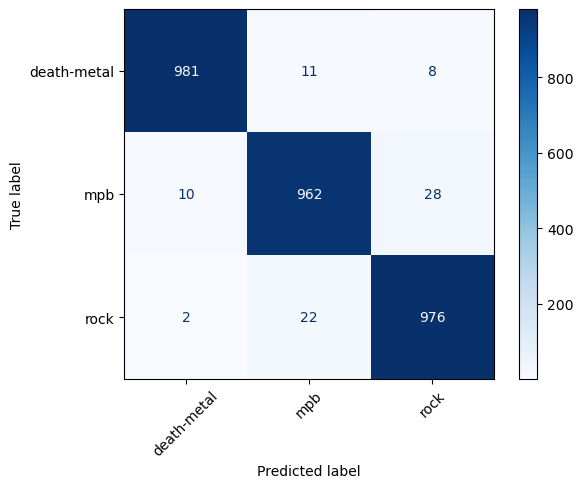

In [5]:
Xs = df.iloc[:, 4:18]
y = df["track_genre"]

t, x, y,z= pDecisionTree(Xs,y)
df_encoded_genr = add_encoded_labels_to_df(y, df)
getAccuracy(x,y,z)

In [6]:
df_with_leaf_nodes =  get_samples_leaf_nodes(best_tree, t)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [7]:
df_completo = pd.merge(df_with_leaf_nodes,df, left_index=True, right_index=True)
lista_colunas =  ['track_id', 'artists', 'album_name', 'track_name','popularity', 'duration_ms', 'explicit', 'danceability', 'leaf_node',
'energy','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
       
df_completo = df_completo[lista_colunas]

df_completo

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,leaf_node,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6g2BiiVQqY5v1S4HIrM54F,Rodrigo Amarante,Tuyo (Narcos Theme) [Extended Version] [A Netf...,Tuyo (Narcos Theme) [Extended Version] - A Net...,66,151565,False,0.765,210,0.497,1,-7.806,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,4,mpb
1,6Dc2tCivms1s2X9myWe4ni,Rodrigo Amarante,Tuyo (Narcos Theme) [A Netflix Original Series...,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,False,0.720,210,0.422,1,-13.338,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,4,mpb
2,76HOOcFt3lKVdScmoScfz1,Djavan,"Djavan ""Ao Vivo""",Azul (Ao Vivo),49,259066,False,0.632,163,0.651,7,-8.658,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,4,mpb
3,4crctLJMKJekuqQ7cQLpHV,Nicolas Candido;Olívia,Apaga a Luz (feat. Olívia),Apaga a Luz (feat. Olívia),49,216446,False,0.610,158,0.420,4,-10.889,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,4,mpb
4,0XXwP0EmpOEqWxcL9aSreJ,Fábio Jr.,Fabio Jr.,Pareço um Menino,50,273906,False,0.580,158,0.330,7,-13.703,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,4,mpb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,78adEMnfn1XolaOh2QAjZS,Brujeria,Brujerizmo,Laboratorio Cristalitos,20,91866,False,0.474,125,0.993,1,-5.850,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,4,death-metal
2996,53c9YHuifgAWJoqgPOgPUn,Unleashed,Gods of Death Metal,Long Before Winter's Call,0,227616,False,0.370,21,0.993,7,-4.465,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,4,death-metal
2997,6us7QqYJGMGZqej8dKCFGC,Bury Your Dead,Cover Your Tracks,Mission: Impossible,21,162973,True,0.307,125,0.976,2,-3.552,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,4,death-metal
2998,5l5XKQmo9M0XHdNAPddq0i,Surra,Bica na Cara,Vida de Babaca,22,135893,True,0.362,209,0.994,6,-1.722,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,4,death-metal


In [22]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def getAllRecommendationsWithDistances(df, feature_start=4, feature_end=19, n_neighbors=5):
    # Select and scale features
    X = df.iloc[:, feature_start:feature_end]
    X["leaf_node"] *2
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit NearestNeighbors model (+1 to include the point itself, which we'll remove)
    knn = NearestNeighbors(n_neighbors=n_neighbors + 1, metric='euclidean')
    knn.fit(X_scaled)

    # Find neighbors
    distances, indices = knn.kneighbors(X_scaled)

    # For each sample, build a dict of {index: distance}, excluding the point itself
    neighbors_dicts = [
        {int(idx): float(dist) for idx, dist in zip(idx_list[1:], dist_list[1:])}
        for idx_list, dist_list in zip(indices, distances)
    ]

    # Add to DataFrame
    df_with_recommendations = df.copy()
    df_with_recommendations["Recommendations"] = neighbors_dicts

    return df_with_recommendations


df_with_recommendations = getAllRecommendationsWithDistances(df_completo)

In [6]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

def interactive_pca_plot(df, genre):
    # === Filter and reduce to first 50 rows ===
    genre_df = df[df["track_genre"] == genre].copy()

    # === Prepare features ===
    features = genre_df.columns[4:19]  # Adjust if necessary
    X = genre_df[features]

    # === Run PCA ===
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # === Create DataFrame for plot ===
    pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
    pca_df["track_name"] = genre_df["track_name"].values
    pca_df["index"] = genre_df.index
    pca_df["track_genre"] = genre_df["track_genre"].values
    pca_df["leaf_node"] = genre_df["leaf_node"].values
    pca_df["origin"] = genre_df.index  # each track is its own origin
    pca_df["type"] = "original"

    # === Add recommendations ===
    for idx in genre_df.index:
        recommendations = df.loc[idx, "Recommendations"]
        for rec_idx in recommendations:
            rec_row = df.loc[rec_idx]
            rec_features = rec_row[features].values.reshape(1, -1)
            rec_pca = pca.transform(rec_features)
            pca_df = pd.concat([
                pca_df,
                pd.DataFrame([{
                    "PC1": rec_pca[0, 0],
                    "PC2": rec_pca[0, 1],
                    "track_name": rec_row["track_name"],
                    "index": rec_idx,
                    "track_genre": rec_row["track_genre"],
                    "leaf_node": rec_row["leaf_node"],
                    "origin": idx,
                    "type": "recommendation"
                }])
            ], ignore_index=True)

    # === Define colors based on original song ===
    unique_origins = pca_df[pca_df["type"] == "original"]["origin"].unique()
    color_map = {
        idx: px.colors.qualitative.Safe[i % len(px.colors.qualitative.Safe)]
        for i, idx in enumerate(unique_origins)
    }
    pca_df["color"] = pca_df["origin"].map(color_map)

    # === Plot using only points with hover info ===
    fig = px.scatter(
        pca_df,
        x="PC1",
        y="PC2",
        color="color",
        hover_data={
            "track_name": True,
            "index": True,
            "track_genre": True,
            "leaf_node": True,
            "type": True,
            "color": False,  # hide actual color code in hover
            "PC1": False,
            "PC2": False
        }
    )
    fig.update_traces(marker=dict(size=8, opacity=0.8), showlegend=False)
    fig.update_layout(title=f"PCA of {genre} Tracks + Recommendations (Hover for details)")
    fig.show()

interactive_pca_plot(df_with_recommendations, "mpb")

NameError: name 'df_with_recommendations' is not defined

In [ ]:
plot_pca_with_recommendations(df_with_recommendations, "death-metal")  
plot_pca_with_recommendations(df_with_recommendations, "rock")  